In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\48504\AppData\Local\Temp\ipykernel_32584\3385592174.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [3]:
# Load data
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [4]:
# Display first 5 rows
df.head()

titles    prices  \
0        3 pokoje z zielonym tarasem i balkonem + MP  759000.0   
1                   Maślicka 166 C | mieszkanie K2_2  616161.0   
2  Bezpieczna/dwustronne/rozkład/co miejskie/piwnica  576000.0   
3  Piłsudskiego/ super/ m. miejskie/ balkon /piwnica  470000.0   
4                         Mieszkanie, 61 m², Wrocław  633000.0   

                                            location   area  \
0          Maślice, Fabryczna, Wrocław, dolnośląskie  61.83   
1  ul. Maślicka 166, Maślice, Fabryczna, Wrocław,...  67.71   
2  Bezpieczna okolice, Różanka, Psie Pole, Wrocła...  57.70   
3  ul. marsz. Józefa Piłsudskiego, Przedmieście Ś...  40.00   
4            Tarnogaj, Krzyki, Wrocław, dolnośląskie  61.00   

   price per square meter  numbers_of_rooms  \
0                   12276                 3   
1                    9100                 3   
2                    9983                 3   
3                   11750                 1   
4                   10377                 3   

                                                urls property_ownership  \
0  https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...     pełna własność   
1  https://www.otodom.pl/pl/oferta/maslicka-166-c...     pełna własność   
2  https://www.otodom.pl/pl/oferta/bezpieczna-dwu...     pełna własność   
3  https://www.otodom.pl/pl/oferta/pilsudskiego-s...            Zapytaj   
4  https://www.otodom.pl/pl/oferta/mieszkanie-61-...     pełna własność   

  condition_of_property   floor  ... utilities_dummy_telefon  \
0       do zamieszkania  parter  ...                       0   
1        do wykończenia  parter  ...                       0   
2       do zamieszkania       4  ...                       1   
3       do zamieszkania       3  ...                       1   
4        do wykończenia       2  ...                       0   

   utilities_dummy_telewizja_kablowa utilities_dummy_woda  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  0                    0   
4                                  0                    0   

  security_dummy_brak_informacji security_dummy_domofon_/_wideofon  \
0                              0                                 1   
1                              1                                 0   
2                              0                                 1   
3                              1                                 0   
4                              0                                 0   

  security_dummy_drzwi_/_okna_antywlamaniowe  \
0                                          1   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

  security_dummy_monitoring_/_ochrona security_dummy_rolety_antywlamaniowe  \
0                                   1                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

  security_dummy_system_alarmowy security_dummy_teren_zamkniety  
0                              0                              1  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              1                              0  

[5 rows x 50 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6666 non-null   object 
 1   prices                                      6666 non-null   float64
 2   location                                    6666 non-null   object 
 3   area                                        6666 non-null   float64
 4   price per square meter                      6666 non-null   int64  
 5   numbers_of_rooms                            6666 non-null   int64  
 6   urls                                        6666 non-null   object 
 7   property_ownership                          6666 non-null   object 
 8   condition_of_property                       6666 non-null   object 
 9   floor                                       6666 non-null   object 
 10  balcon_garde

In [9]:
# Get list of numerical columns
#numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int8', 'int32', 'int64', 'float64']]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  df.select_dtypes(include=numerics).columns

numerical_cols

Index(['prices', 'area', 'price per square meter', 'numbers_of_rooms',
       'amount_of_rent', 'number_of_floors',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_rolety_antywlamaniowe',
       'security_dummy_system_alarmowy', 'security_dummy_teren_zamkniety'],
      dtype='object')

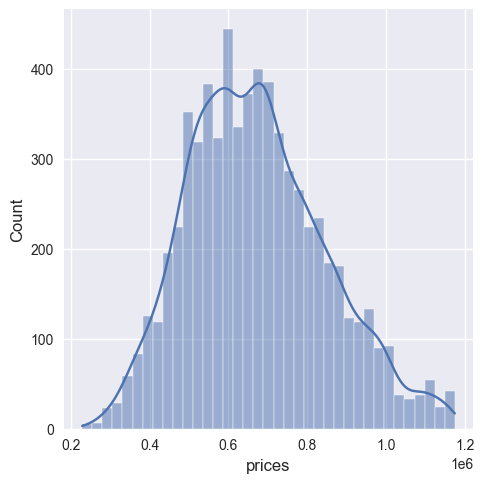

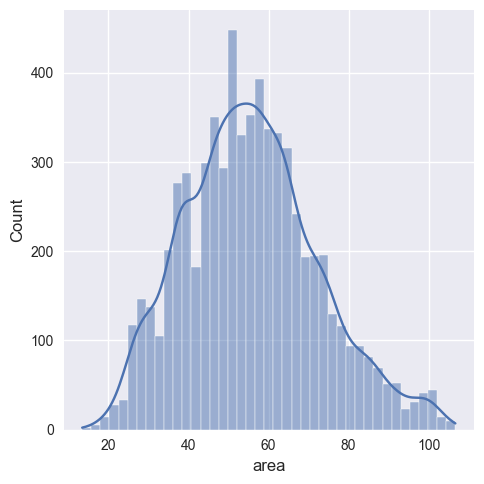

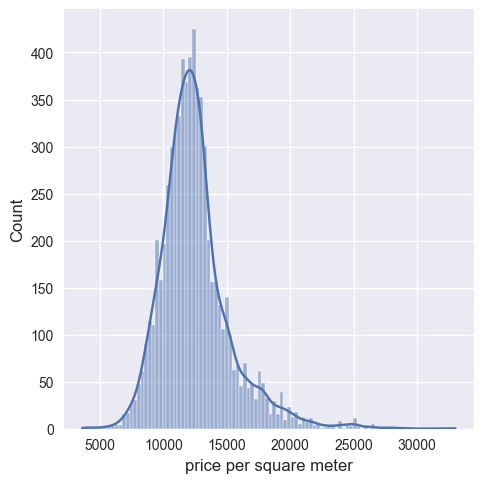

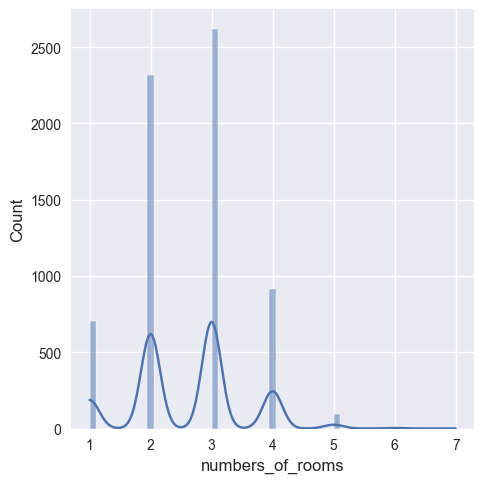

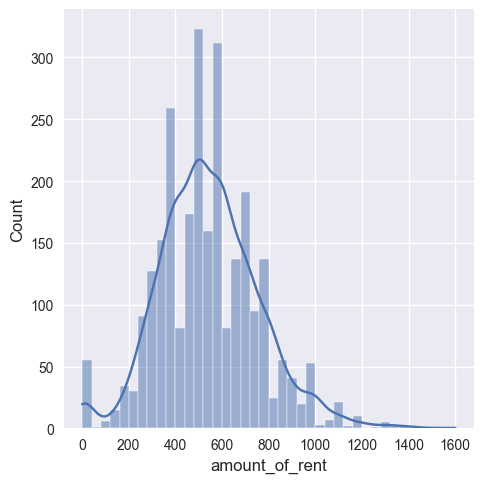

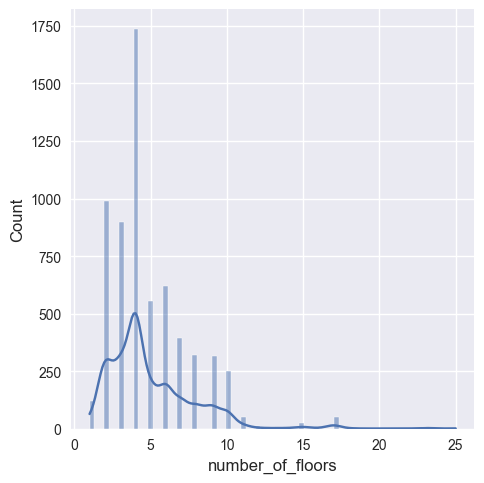

In [14]:
# Display distribution of first 5 numerical columns
for cname in numerical_cols[0:6]:
    sns.displot(data=df, x=cname,  kde=True)

In [12]:
# Check for outliers in the "amount_of_rent" column
df[(df['amount_of_rent'] > 4000 )]["amount_of_rent"]

2553    13000.0
Name: amount_of_rent, dtype: float64

In [13]:
# Only one row has rent amount higher than 4000 and probably it is a mistake so we will change it to 1300
df.loc[(df['amount_of_rent'] > 4000 ), 'amount_of_rent'] = 1300

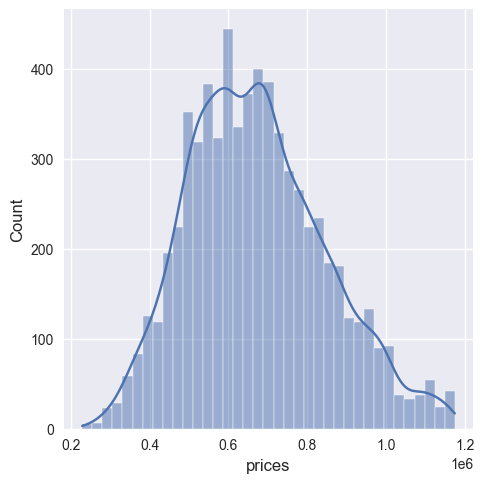

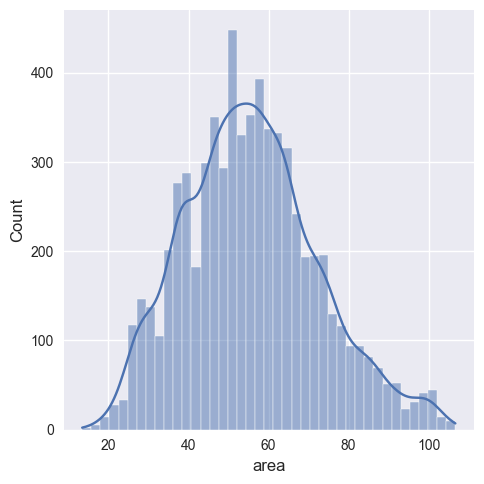

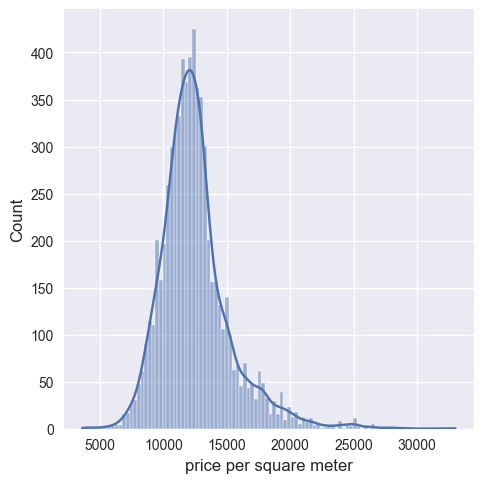

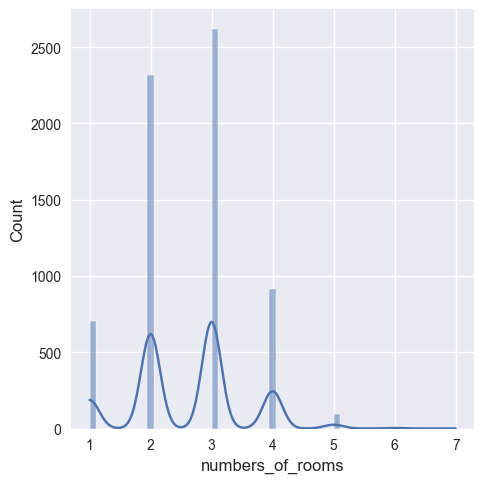

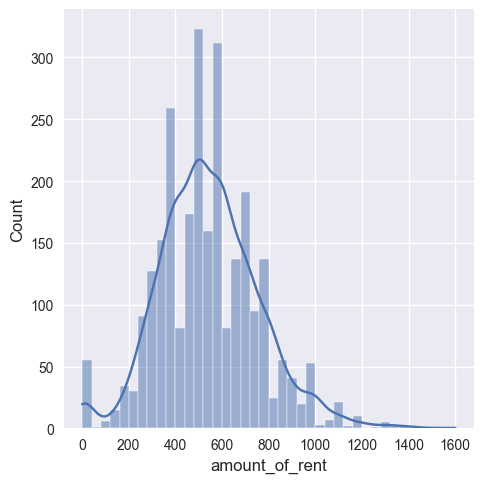

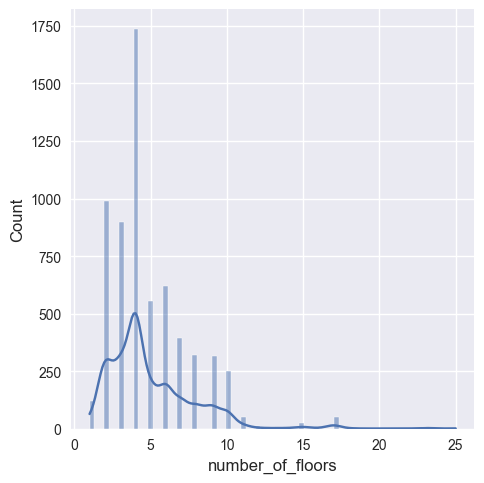

In [15]:
# Again display distribution of first 5 numerical columns
for cname in numerical_cols[0:6]:
    sns.displot(data=df, x=cname,  kde=True)

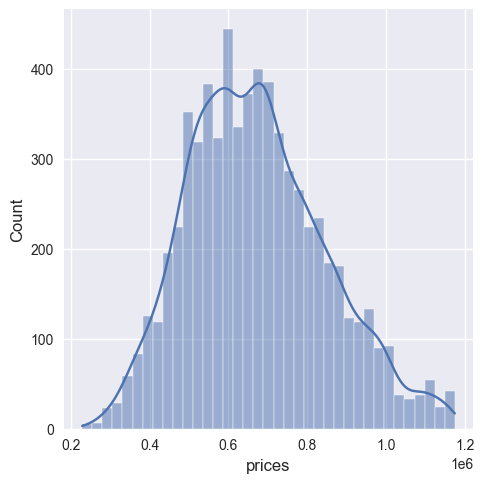

In [16]:
# Display distribution of prices
sns.displot(data=df, x="prices",  kde=True)

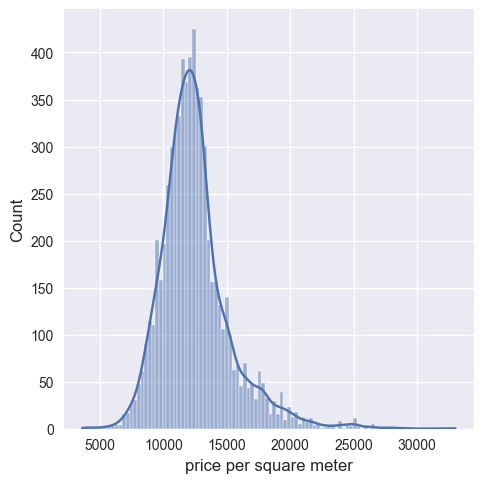

In [17]:
# Display distribution of prices per square meter
sns.displot(data=df, x="price per square meter",  kde=True)

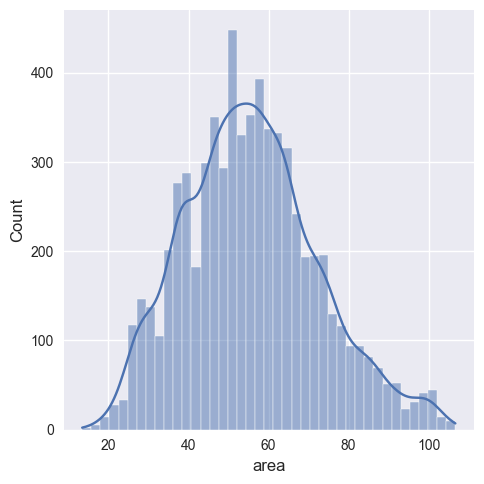

In [18]:
# Display distribution of area
sns.displot(data=df, x="area",  kde=True)

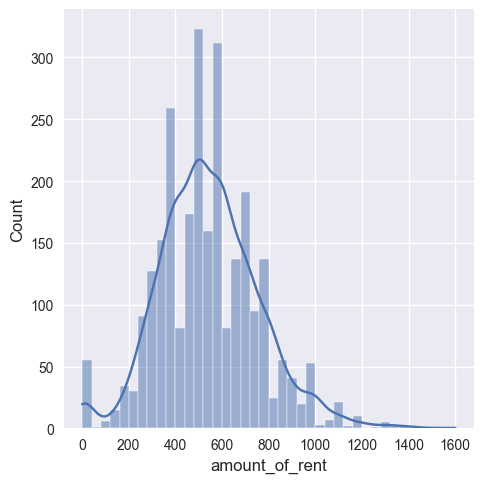

In [20]:
# Display distribution of amount of rent
sns.displot(data=df, x="amount_of_rent",  kde=True)

<Axes: >

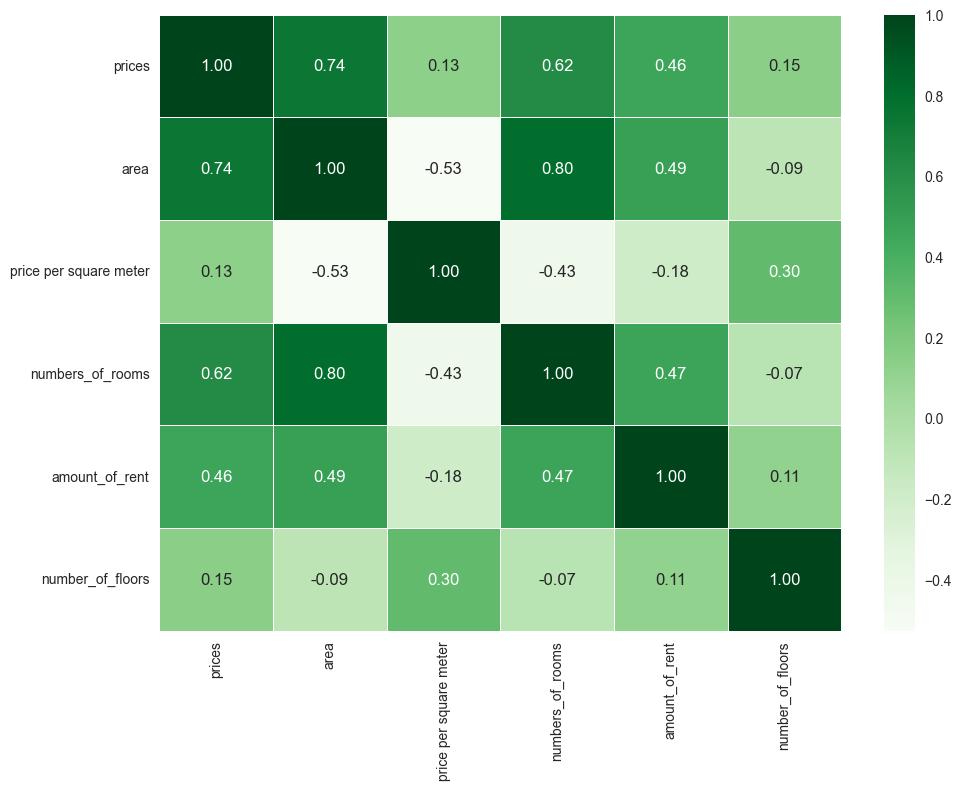

In [21]:
# Display correlation matrix 
corr = df[numerical_cols[:6]].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

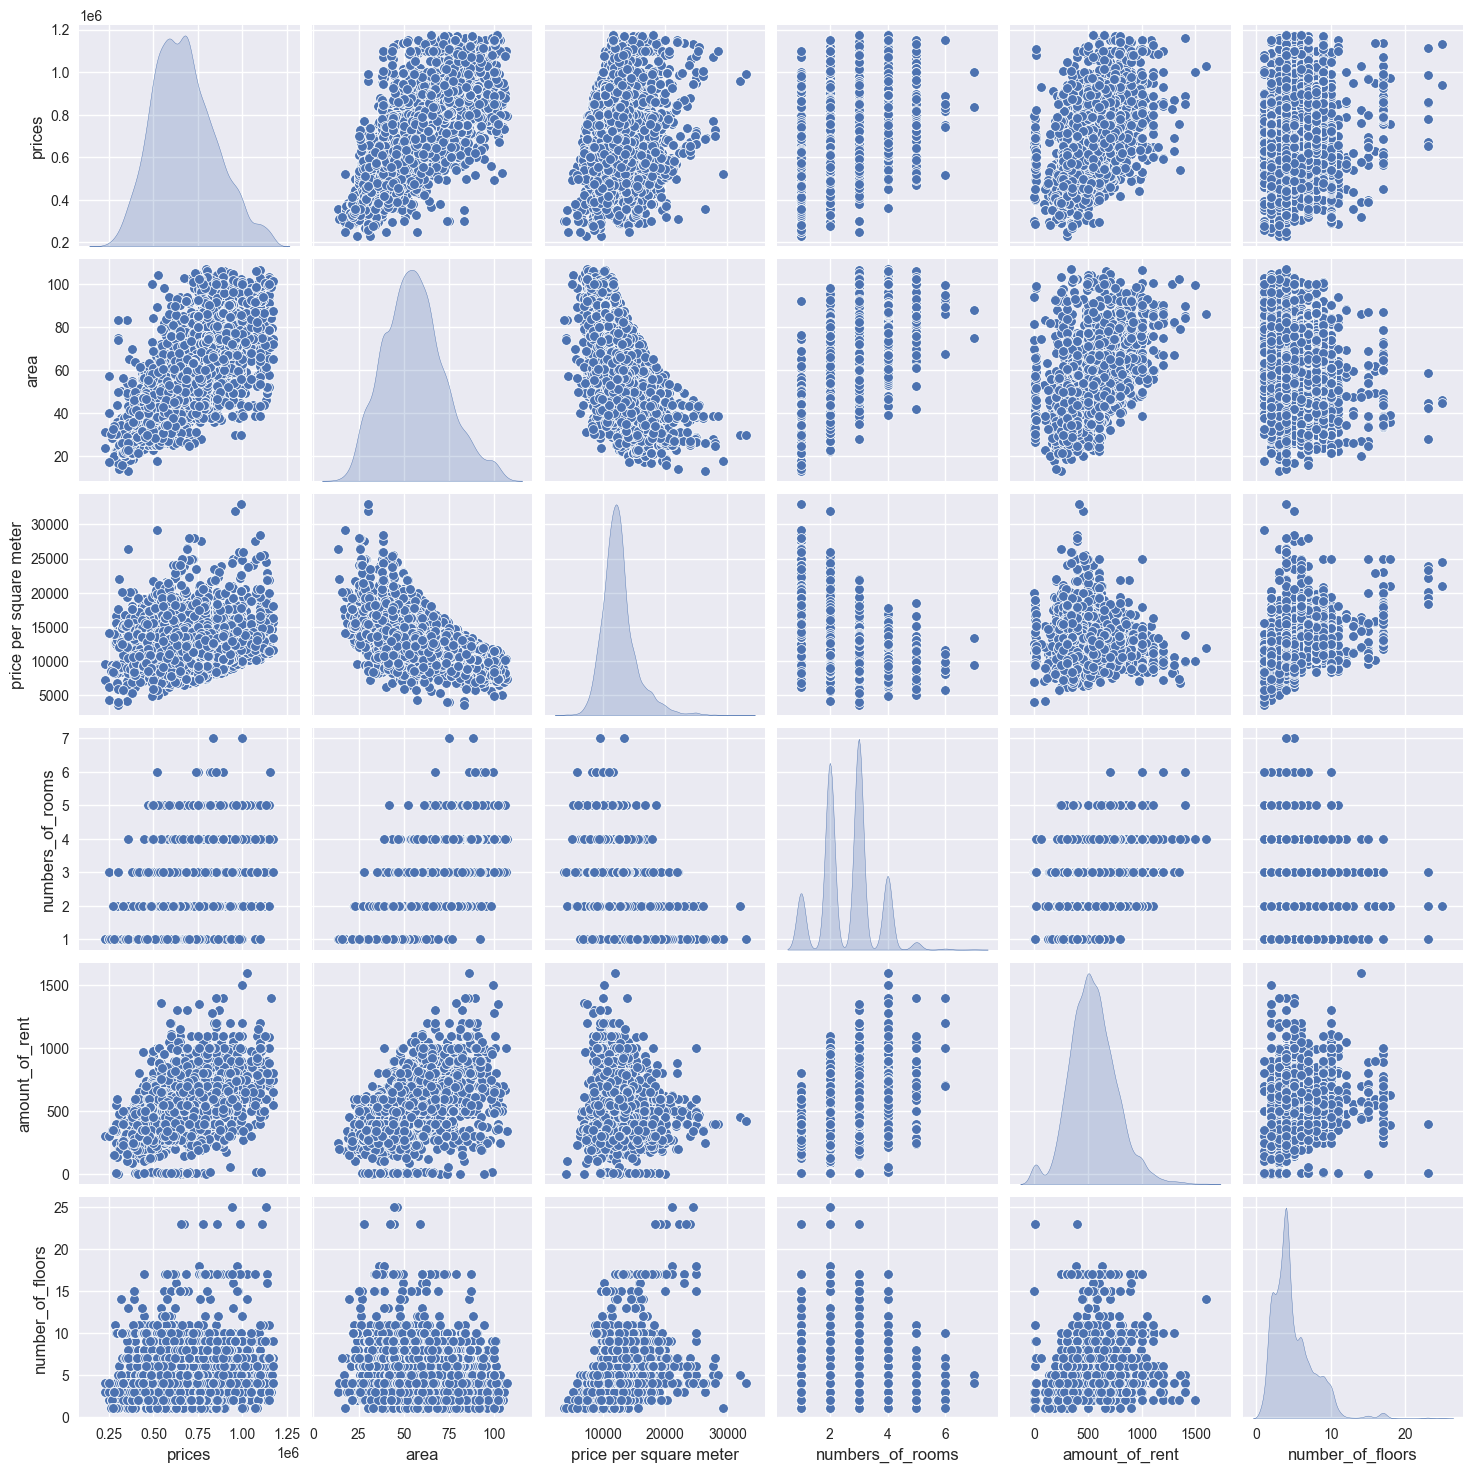

In [37]:
# Display pairplot
sns.pairplot(data=df[numerical_cols[:6]], diag_kind="kde", height=2.5)

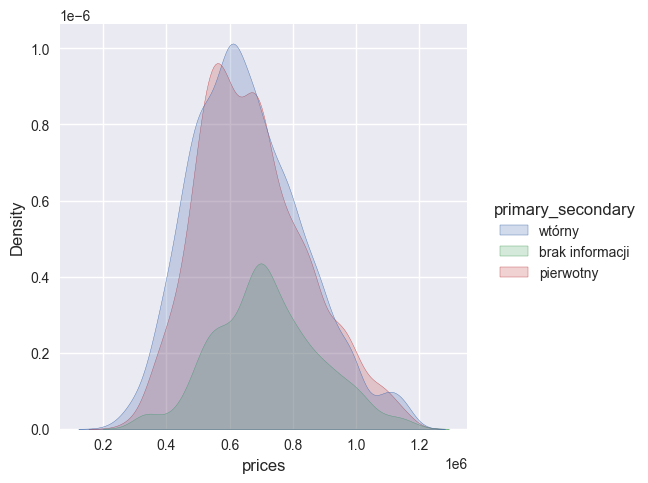

In [38]:
# Display distribution of prices for primary and secondary market
sns.displot(df, x="prices", hue="primary_secondary",  kind="kde", fill=True)

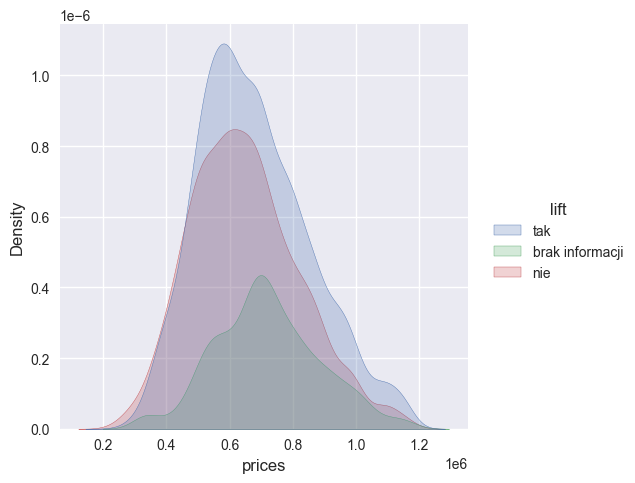

In [39]:
# Display distribution of prices for lift and no lift
sns.displot(df, x="prices", hue="lift",  kind="kde", fill=True)

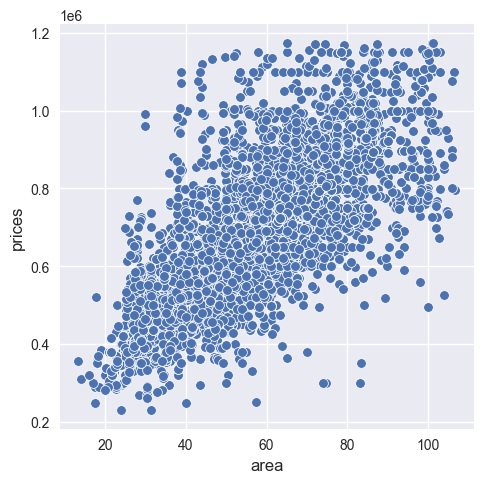

In [40]:
# Display scatter plot of prices and area
sns.relplot(data=df, x="area", y="prices")

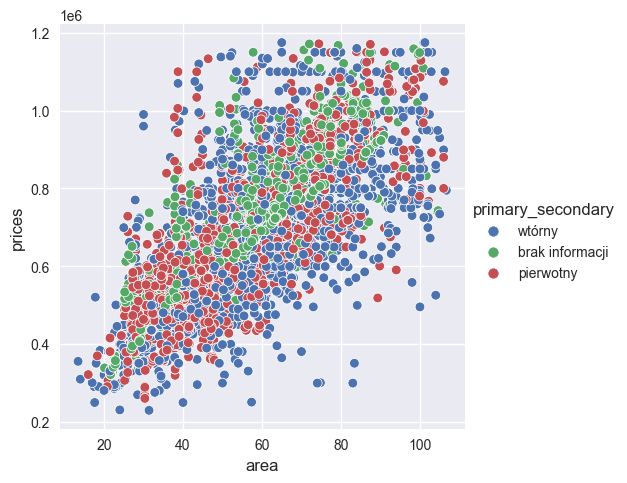

In [41]:
# Check if correlation between prices and area is different for primary and secondary market
sns.relplot(data=df, x="area", y="prices", hue="primary_secondary")

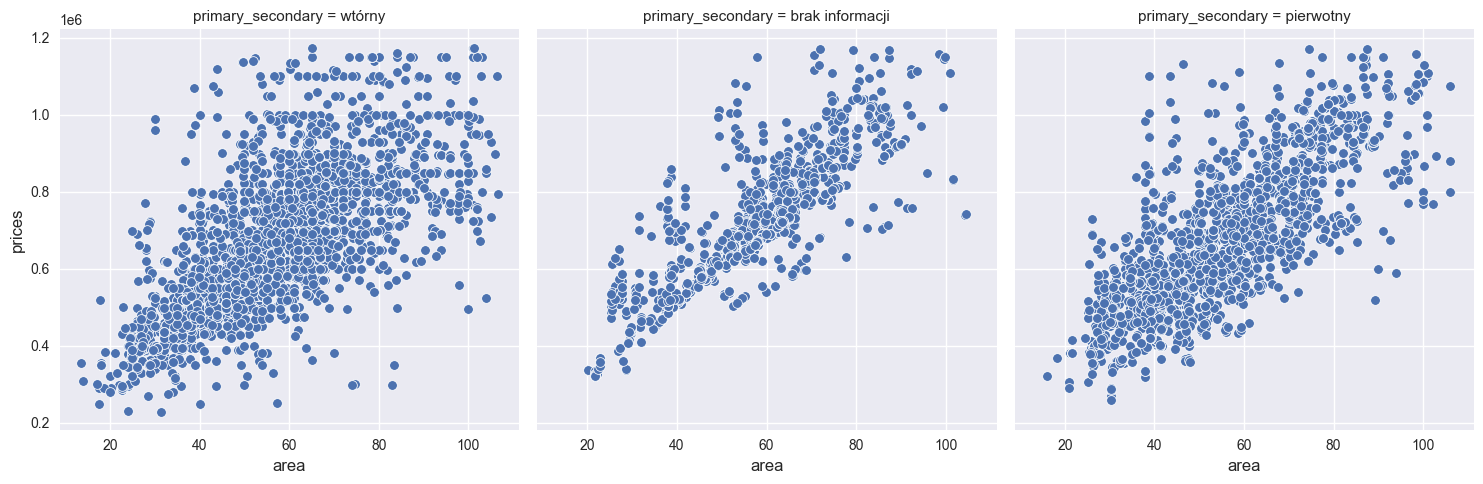

In [45]:
# Check if correlation between prices and area is different for primary and secondary market
sns.relplot(data=df, x="area", y="prices", col="primary_secondary")

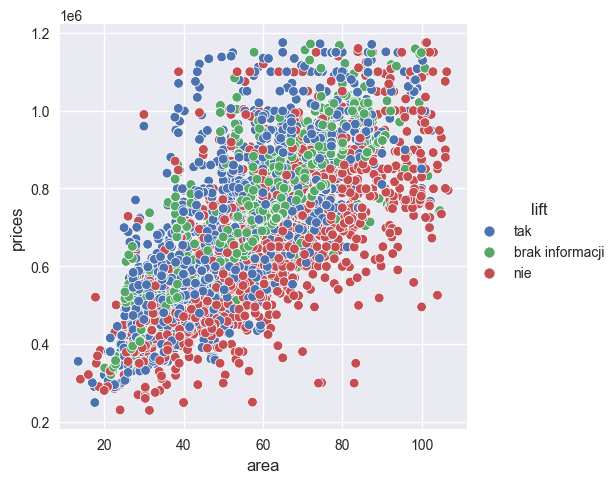

In [47]:
# Check if correlation between prices and area is different for lift and no lift
sns.relplot(data=df, x="area", y="prices", hue="lift")

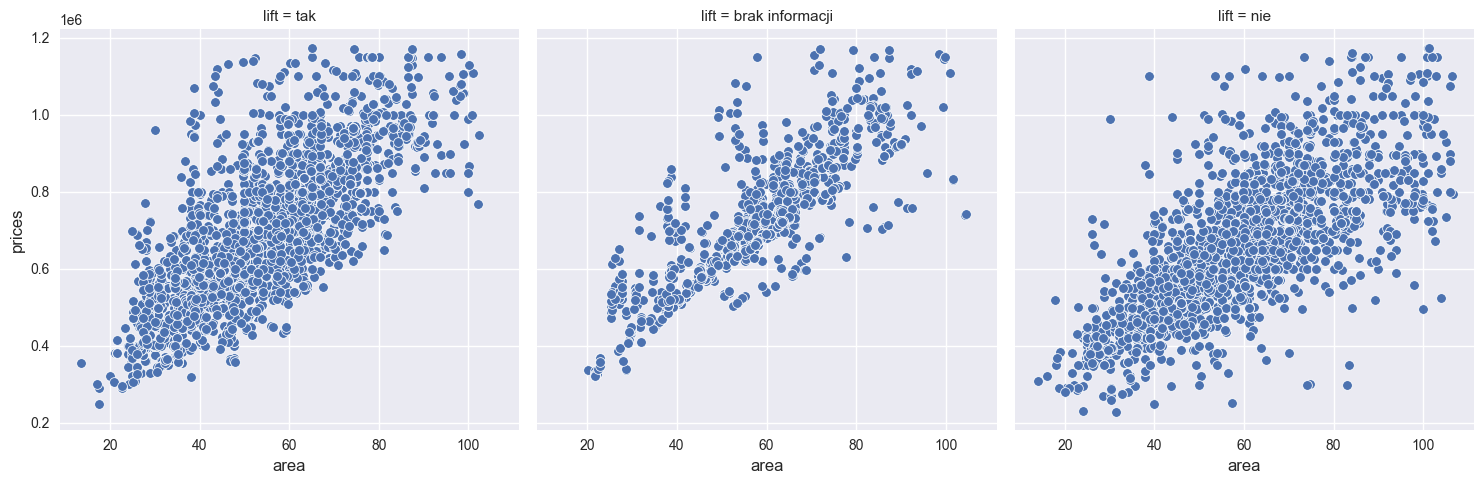

In [48]:
# Check if correlation between prices and area is different for lift and no lift
sns.relplot(data=df, x="area", y="prices", col="lift")

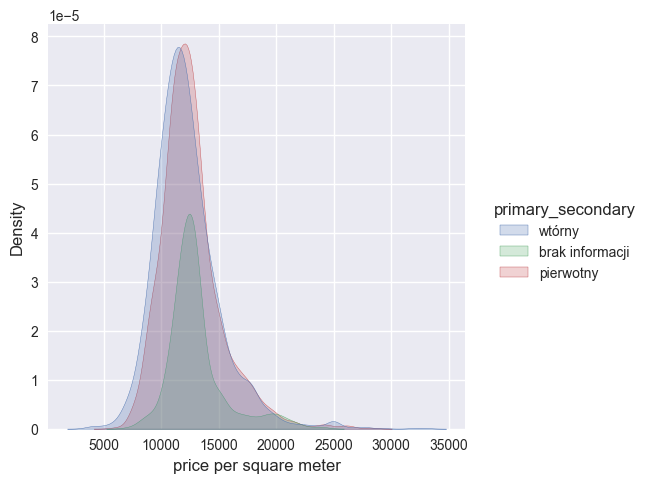

In [50]:
# Display distribution of prices per square meter for primary and secondary market
sns.displot(df, x="price per square meter", hue="primary_secondary",  kind="kde", fill=True)

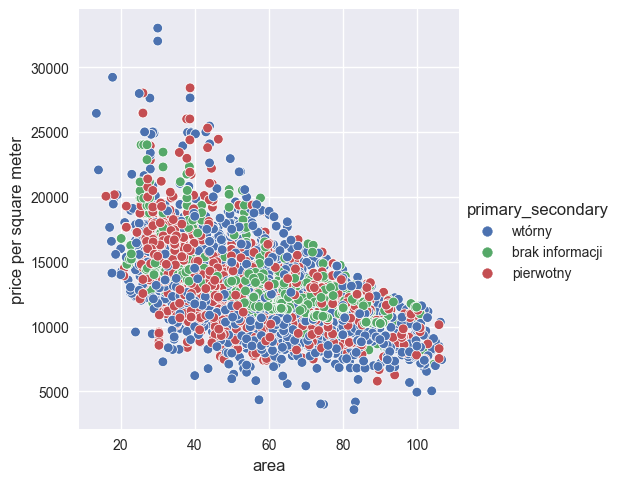

In [51]:
# Check if correlation between prices per square meter and area is different for primary and secondary market
sns.relplot(data=df, x="area", y="price per square meter", hue="primary_secondary")

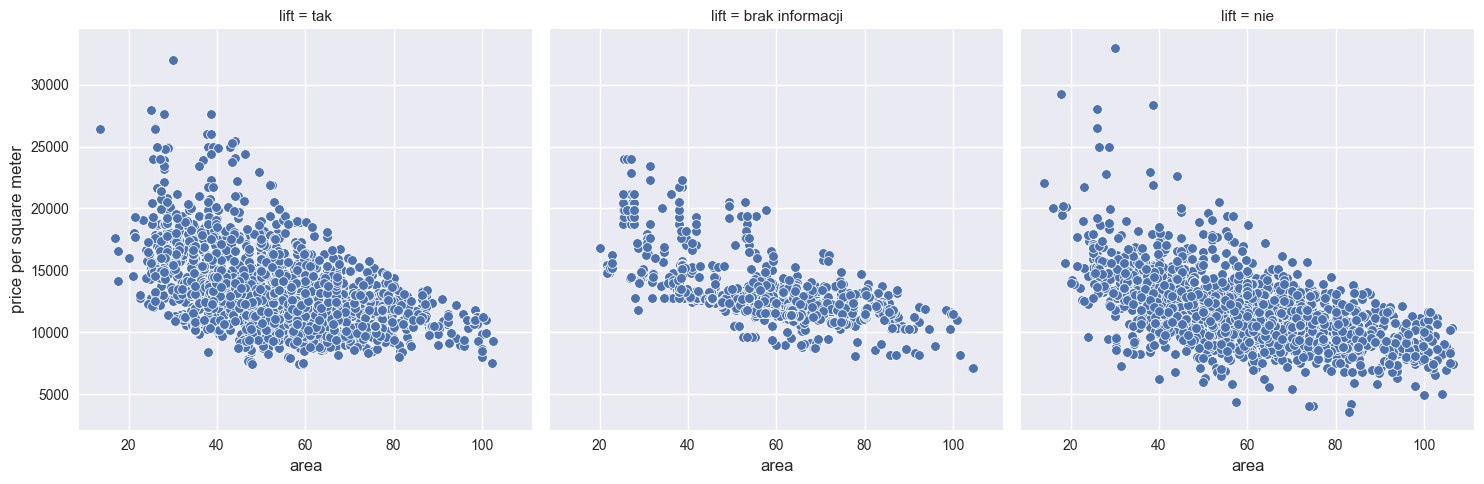

In [53]:
# Check if correlation between prices per square meter and area is different for lift and no lift
sns.relplot(data=df, x="area", y="price per square meter", col="lift")

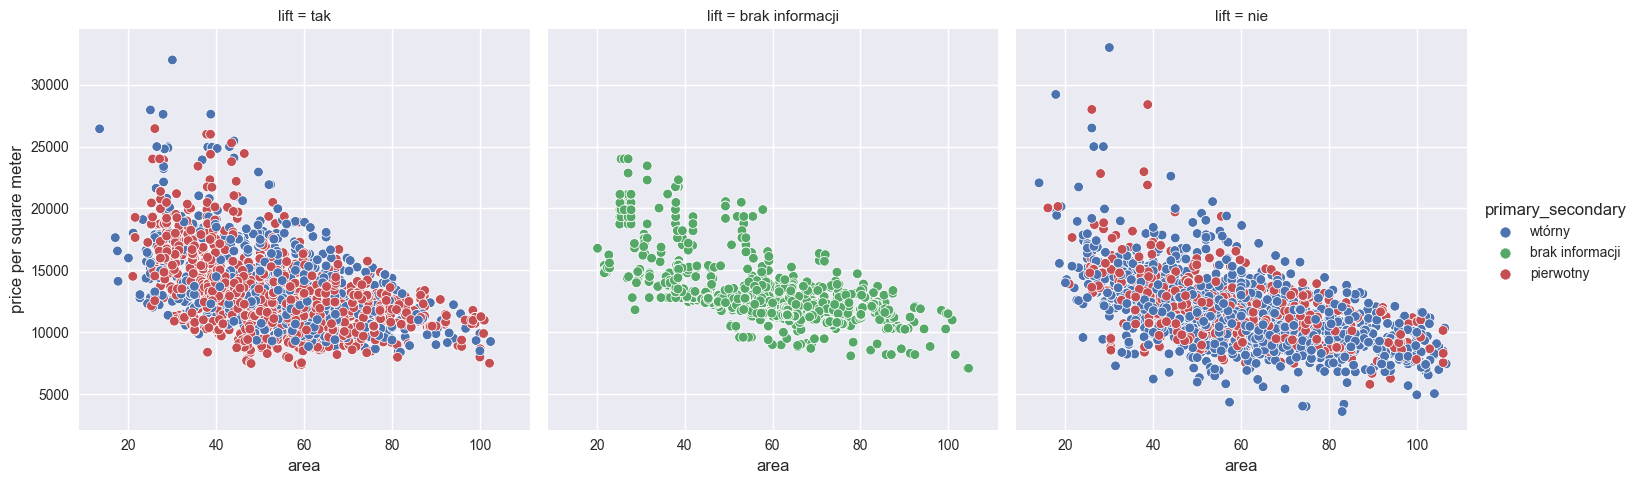

In [56]:
# Check relation between prices per square meter and area for primary/ secondary market and lift/ no lift
sns.relplot(data=df,
            x="area", y="price per square meter",
            hue="primary_secondary",
            col="lift",
            kind="scatter")

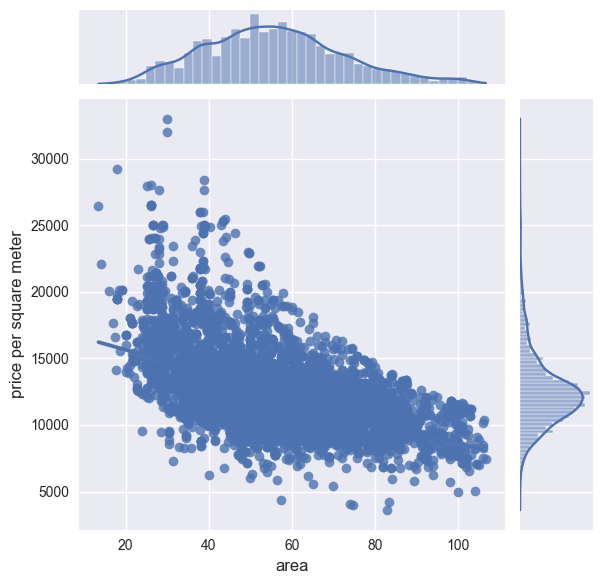

In [27]:
sns.jointplot(x="area", y="price per square meter", data=df, kind="reg");

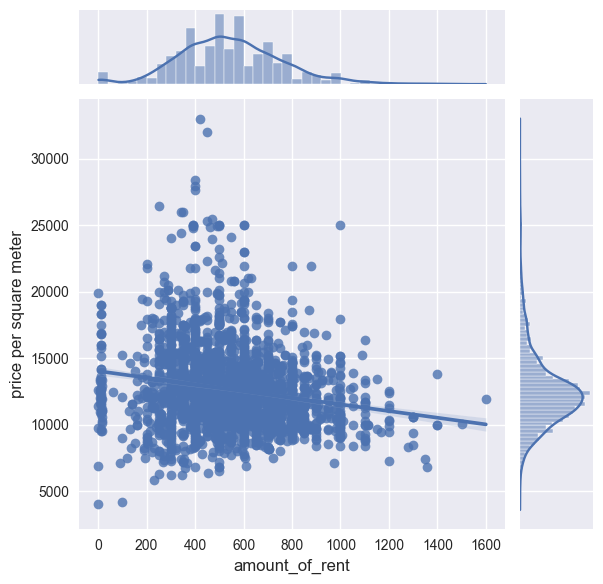

In [28]:
sns.jointplot(x="amount_of_rent", y="price per square meter", data=df, kind="reg");

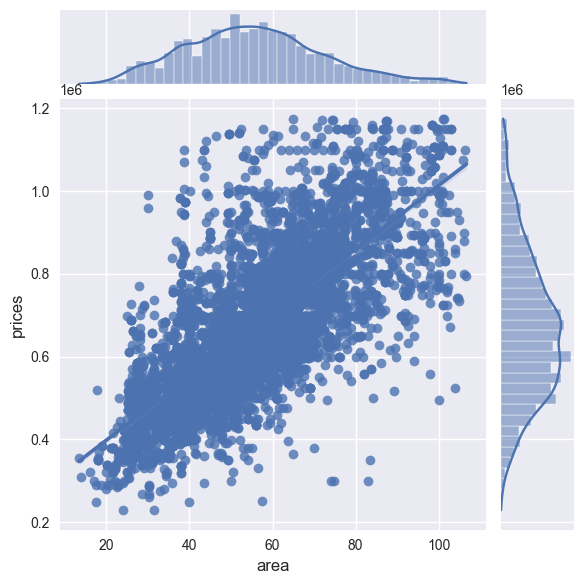

In [29]:
sns.jointplot(x="area", y="prices", data=df, kind="reg");

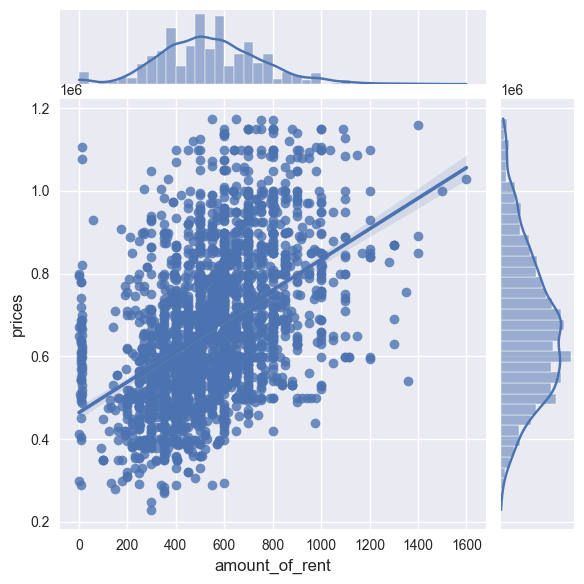

In [57]:
sns.jointplot(x="amount_of_rent", y="prices", data=df, kind="reg")

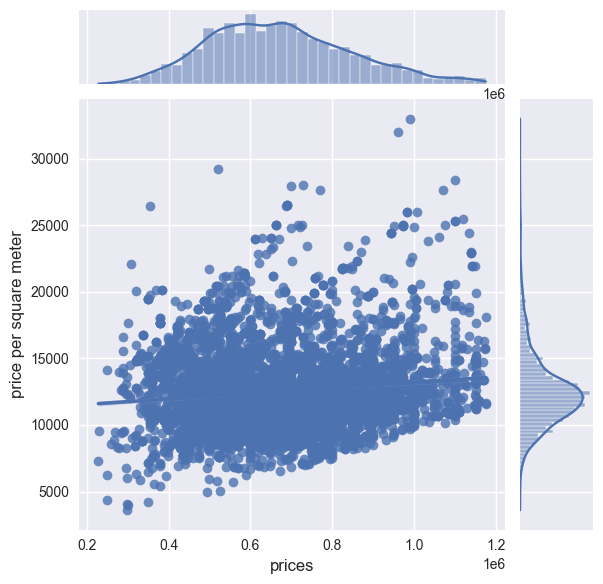

In [58]:
sns.jointplot(x="prices", y="price per square meter", data=df, kind="reg")

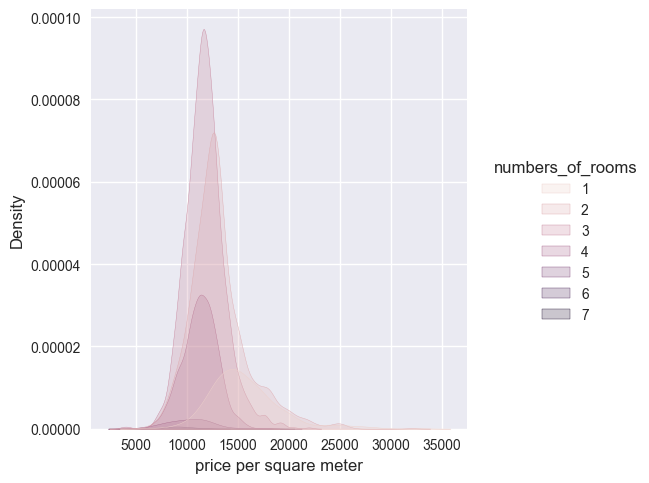

In [32]:
sns.displot(df, x="price per square meter", hue="numbers_of_rooms",  kind="kde", fill=True)

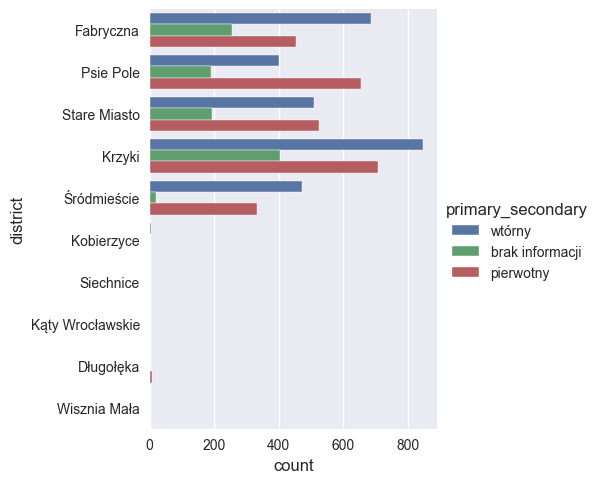

In [59]:
# Check number of offers for each district for primary and secondary market
sns.catplot(data=df, y="district",  hue="primary_secondary", kind="count")

In [60]:
# On the chart above we can see that there are some districts with very few offers so we will remove them

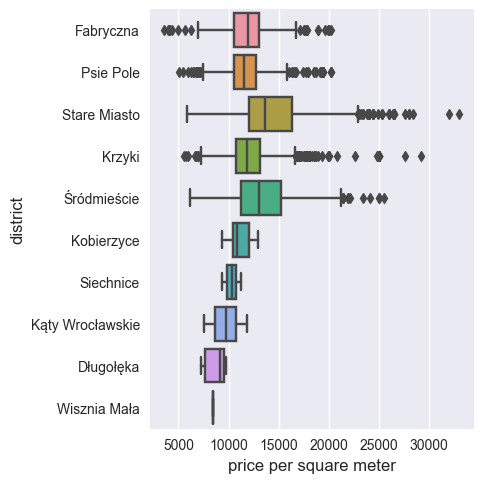

In [61]:
# Display chart with prices per square meter for each district
sns.catplot(data=df,x="price per square meter", y="district", kind="box")

In [62]:
# Agregate data by district and check simple statistics
df_gr_by_districts = df.groupby(["district"]).agg(
                          Number_of_offers = ("titles", "count"),
                          Price_min = ("prices", "min"),
                          Price_median = ("prices", "median"),
                          Price_mean = ("prices", "mean"),
                          Price_max = ("prices", "max"),
                          Area_min = ("area", "min"),
                          Area_median = ("area", "median"),
                          Area_mean = ("area", "mean"),
                          Area_max = ("area", "max"),
                          Price_psm_mean = ("price per square meter", "mean"),
                          Price_psm_median = ("price per square meter", "median"),
                        ).round(2)
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts

Number_of_offers  Price_min  Price_median  Price_mean  \
district                                                                  
Krzyki                        1960   259710.0      657231.5   666176.21   
Fabryczna                     1393   228900.0      649000.0   650241.44   
Psie Pole                     1246   249000.0      630000.0   635083.80   
Stare Miasto                  1224   230000.0      699995.0   717510.10   
Śródmieście                    822   309000.0      699000.0   718891.65   
Długołęka                        8   565000.0      631300.0   632025.00   
Kobierzyce                       7   530000.0      699000.0   800857.14   
Siechnice                        3   284400.0      840000.0   674466.67   
Kąty Wrocławskie                 2   460000.0      554500.0   554500.00   
Wisznia Mała                     1   669000.0      669000.0   669000.00   

                  Price_max  Area_min  Area_median  Area_mean  Area_max  \
district                                                                  
Krzyki            1152924.0     17.80        56.52      56.93    106.68   
Fabryczna         1151528.0     16.01        55.10      56.53    104.61   
Psie Pole         1134097.0     17.50        54.74      55.75    106.34   
Stare Miasto      1175000.0     13.43        50.46      52.29    102.86   
Śródmieście       1171800.0     14.00        55.00      56.27    106.00   
Długołęka          698000.0     60.00        68.00      73.81     92.50   
Kobierzyce        1086000.0     48.00        58.00      73.36    101.76   
Siechnice          899000.0     30.34        80.22      63.85     81.00   
Kąty Wrocławskie   649000.0     54.74        57.87      57.87     61.00   
Wisznia Mała       669000.0     79.00        79.00      79.00     79.00   

                  Price_psm_mean  Price_psm_median  
district                                            
Krzyki                  12071.61           11811.5  
Fabryczna               11795.77           11935.0  
Psie Pole               11638.77           11535.5  
Stare Miasto            14459.78           13668.0  
Śródmieście             13309.55           13000.0  
Długołęka                8750.50            9182.0  
Kobierzyce              11140.43           10855.0  
Siechnice               10317.00           10370.0  
Kąty Wrocławskie         9698.50            9698.5  
Wisznia Mała             8468.00            8468.0

<Axes: xlabel='district'>

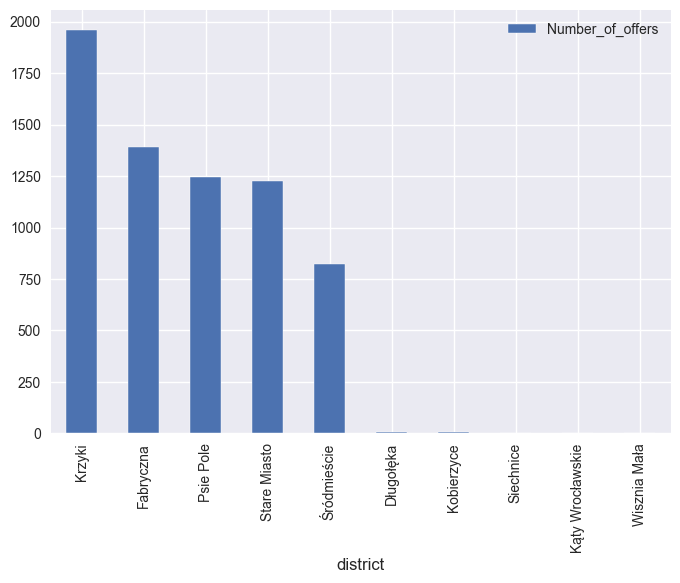

In [63]:
# One more time check number of offers for each district
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts[["Number_of_offers"]].plot(kind='bar')

<Axes: xlabel='district'>

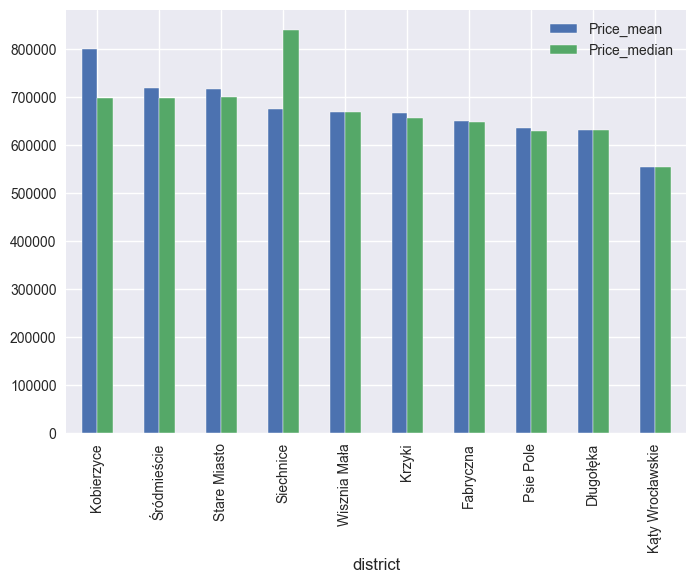

In [37]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_mean", ascending = False)
df_gr_by_districts[["Price_mean","Price_median"]].plot(kind='bar')

<Axes: xlabel='district'>

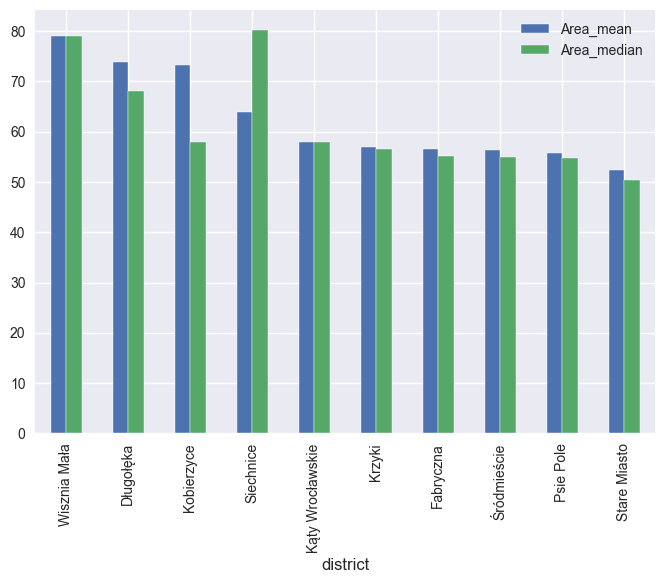

In [38]:
df_gr_by_districts = df_gr_by_districts.sort_values("Area_mean", ascending = False)
df_gr_by_districts[["Area_mean","Area_median"]].plot(kind='bar')

<Axes: xlabel='district'>

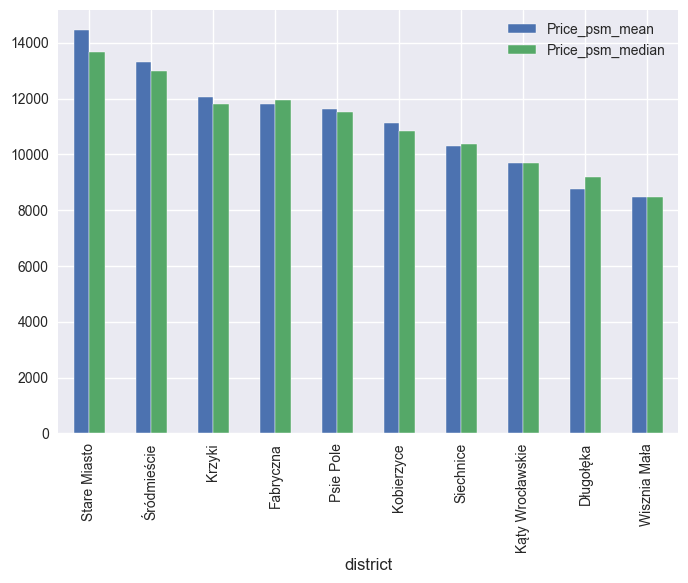

In [39]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_psm_mean", ascending = False)
df_gr_by_districts[["Price_psm_mean","Price_psm_median"]].plot(kind='bar')

In [66]:
# Get list of districts with less than 10 offers
districts_with_less_than_10_offers = df_gr_by_districts[df_gr_by_districts["Number_of_offers"] < 10].index.tolist()
districts_with_less_than_10_offers

['Długołęka', 'Kobierzyce', 'Siechnice', 'Kąty Wrocławskie', 'Wisznia Mała']

In [67]:
df.shape

(6666, 50)

In [69]:
# Remove rows with districts with less than 10 offers
df = df[~df["district"].isin(districts_with_less_than_10_offers)]

In [70]:
df.shape

(6645, 50)

In [71]:
# Agregate data by district and check simple statistics after removing districts with less than 10 offers
df_gr_by_districts = df.groupby(["district"]).agg(
                          Number_of_offers = ("titles", "count"),
                          Price_min = ("prices", "min"),
                          Price_median = ("prices", "median"),
                          Price_mean = ("prices", "mean"),
                          Price_max = ("prices", "max"),
                          Area_min = ("area", "min"),
                          Area_median = ("area", "median"),
                          Area_mean = ("area", "mean"),
                          Area_max = ("area", "max"),
                          Price_psm_mean = ("price per square meter", "mean"),
                          Price_psm_median = ("price per square meter", "median"),
                        ).round(2)
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts

Number_of_offers  Price_min  Price_median  Price_mean  \
district                                                              
Krzyki                    1960   259710.0      657231.5   666176.21   
Fabryczna                 1393   228900.0      649000.0   650241.44   
Psie Pole                 1246   249000.0      630000.0   635083.80   
Stare Miasto              1224   230000.0      699995.0   717510.10   
Śródmieście                822   309000.0      699000.0   718891.65   

              Price_max  Area_min  Area_median  Area_mean  Area_max  \
district                                                              
Krzyki        1152924.0     17.80        56.52      56.93    106.68   
Fabryczna     1151528.0     16.01        55.10      56.53    104.61   
Psie Pole     1134097.0     17.50        54.74      55.75    106.34   
Stare Miasto  1175000.0     13.43        50.46      52.29    102.86   
Śródmieście   1171800.0     14.00        55.00      56.27    106.00   

              Price_psm_mean  Price_psm_median  
district                                        
Krzyki              12071.61           11811.5  
Fabryczna           11795.77           11935.0  
Psie Pole           11638.77           11535.5  
Stare Miasto        14459.78           13668.0  
Śródmieście         13309.55           13000.0

<Axes: xlabel='district'>

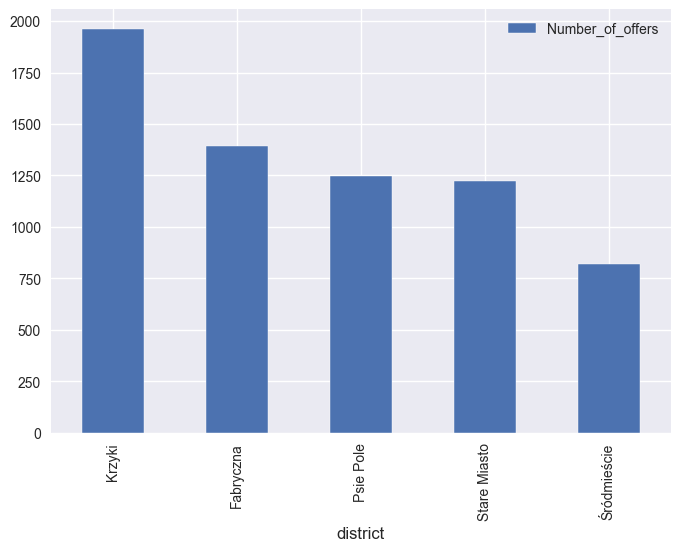

In [72]:
# One more time check number of offers for each district
df_gr_by_districts = df_gr_by_districts.sort_values("Number_of_offers", ascending = False)
df_gr_by_districts[["Number_of_offers"]].plot(kind='bar')

<Axes: xlabel='district'>

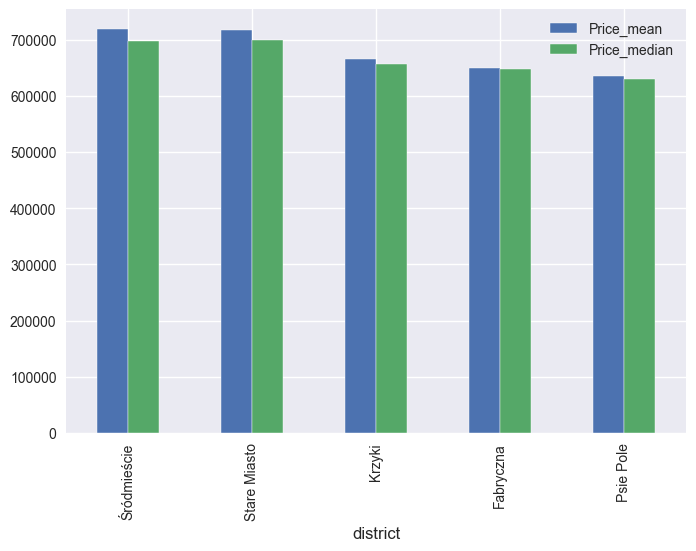

In [73]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_mean", ascending = False)
df_gr_by_districts[["Price_mean","Price_median"]].plot(kind='bar')

<Axes: xlabel='district'>

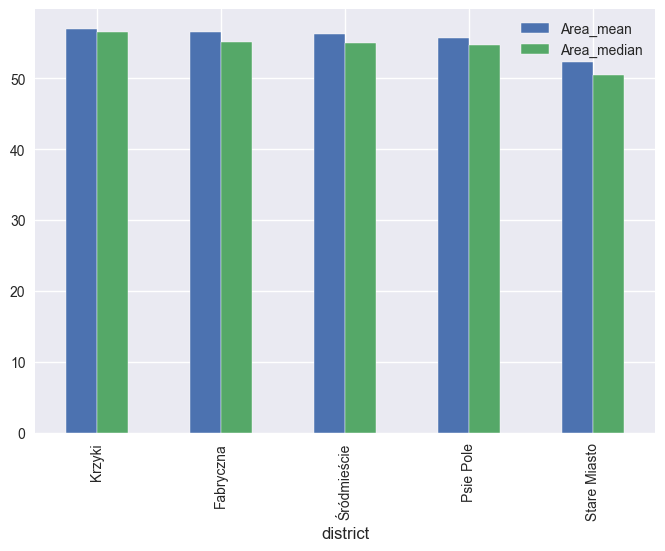

In [76]:
df_gr_by_districts = df_gr_by_districts.sort_values("Area_mean", ascending = False)
df_gr_by_districts[["Area_mean","Area_median"]].plot(kind='bar')

<Axes: xlabel='district'>

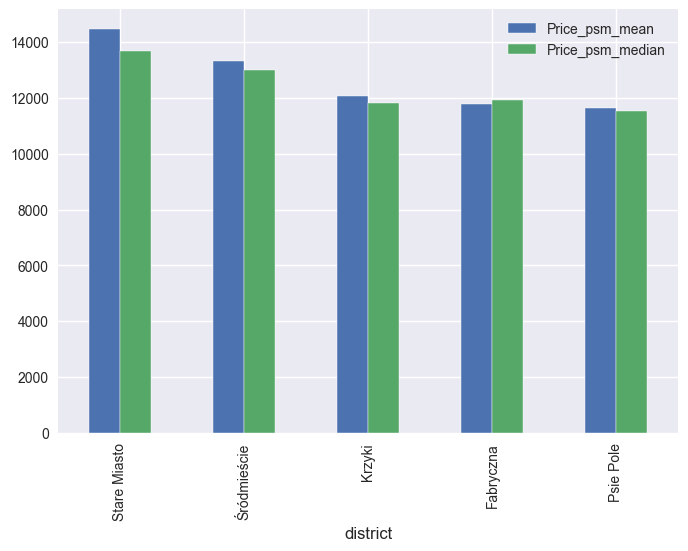

In [77]:
df_gr_by_districts = df_gr_by_districts.sort_values("Price_psm_mean", ascending = False)
df_gr_by_districts[["Price_psm_mean","Price_psm_median"]].plot(kind='bar')

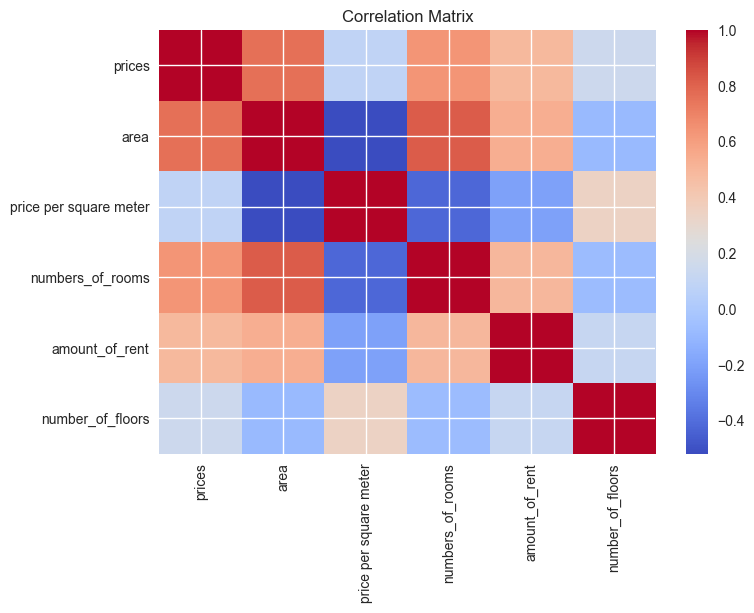

In [81]:
correlation_matrix1 = df[numerical_cols[:6]].corr(method="spearman", numeric_only=True)
plt.imshow(correlation_matrix1, cmap='coolwarm', interpolation='nearest', )
plt.colorbar()
plt.xticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns, rotation=90)
plt.yticks(range(len(correlation_matrix1.columns)), correlation_matrix1.columns)
plt.title('Correlation Matrix')
plt.show()

In [79]:
corr = df[numerical_cols[:6]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\48504\AppData\Local\Temp\ipykernel_32584\1356858525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [42]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

<Axes: >

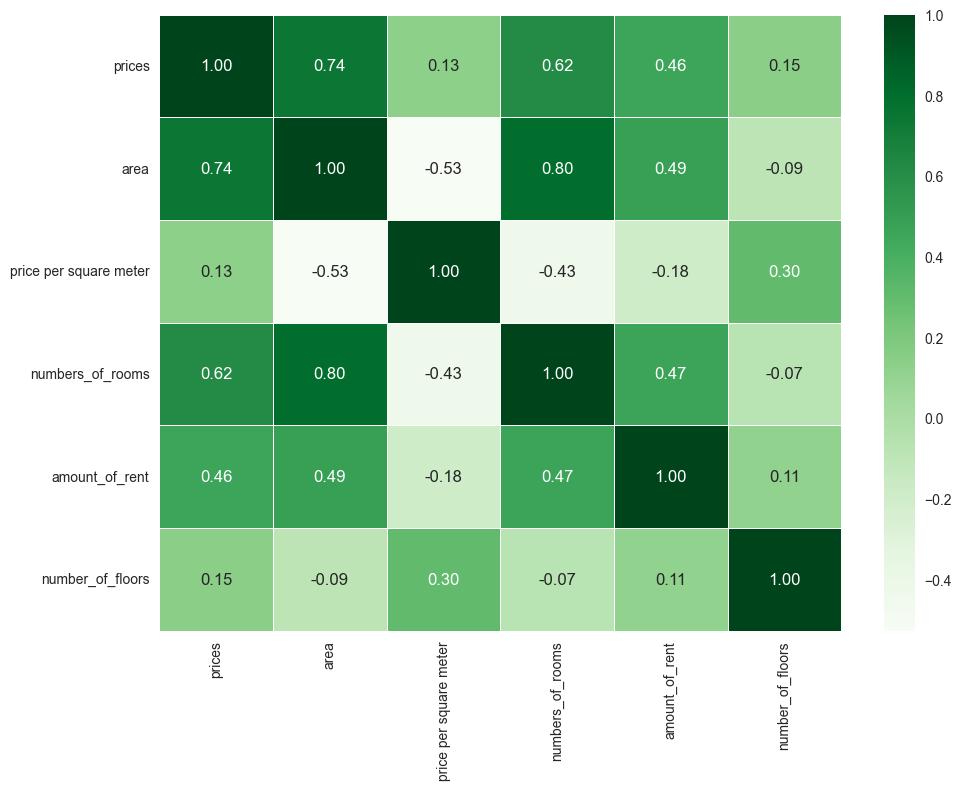

In [43]:
corr = df[numerical_cols[:6]].corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Save data to csv file because were cleaned up

In [83]:
URL = "oto_dom_wroclaw_30_10_2023_cleaned_up"

In [84]:
df.to_csv(URL, index=False, sep=",", encoding="utf-8")